In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from starkhelium import *
from scipy.constants import h, hbar, c, alpha, m_e, e, epsilon_0, atomic_mass, pi, physical_constants
a_0 = physical_constants['Bohr radius'][0]

In [10]:
def count_oscillations(data):
    deriv = np.diff(data)
    osc_count = 0
    curr_grad = deriv[0]
    for grad in deriv[1:]:
        if grad*curr_grad < 0:
            osc_count += 1
        curr_grad = grad
    return osc_count/2

In [12]:
def rabi_osc_varying_g(t_arr, g_arr, title=''):
    step_t = t_arr[1]-t_arr[0]
    pop_transfer = []
    for i, t_val in enumerate(t_arr):
        integral = np.sum(g_arr[:i])*step_t
        pop_trans = (np.cos(pi+2*pi* integral )+1)/2
        pop_transfer.append( pop_trans )

    fig, ax1 = plt.subplots(figsize=(12,4))
    ax1.plot(t_arr*10**6, pop_transfer, 'b')
    ax1.set_xlabel('$time (\mu s)$')
    ax1.set_ylabel('Population transfer', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_title(title)
    ax2 = ax1.twinx()
    ax2.plot(t_arr*10**6, np.abs(g_arr)/(10**6), 'r')
    ax2.set_ylabel('Coupling, g (MHz)', color='r')
    ax2.tick_params('y', colors='r')

    N=count_oscillations(pop_transfer)
    print('Constant g: ', N, 'oscillations')

Constant g:  62.0 oscillations


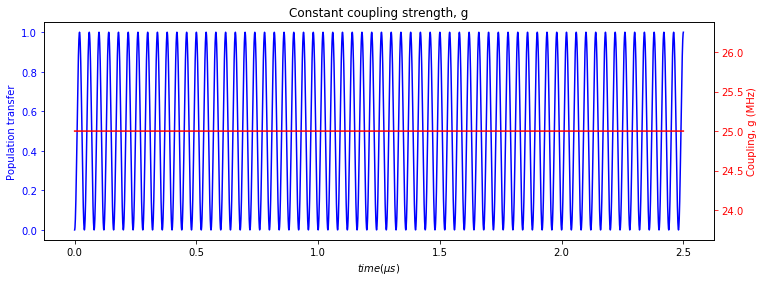

In [13]:
# Constant g
title = 'Constant coupling strength, g'
v = 2000
l = 5 *10**-3
g_max = 25 *10**6
num_wavelengths = 1/4
steps=5000
t = l/v

t_arr = np.linspace(0,t,steps)
g_arr = g_max*np.ones(steps)

rabi_osc_varying_g(t_arr, g_arr, title=title)

Constant g:  47.5 oscillations


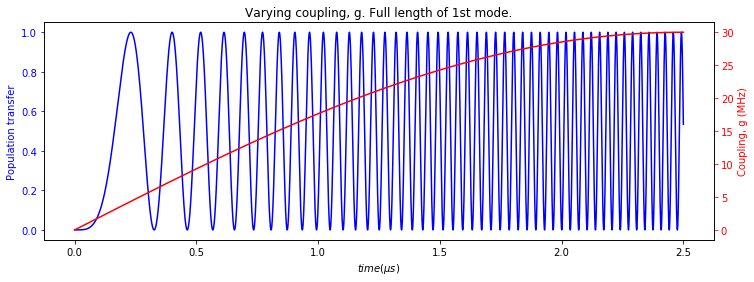

In [14]:
# Fundamental mode, full length
title = 'Varying coupling, g. Full length of 1st mode.'
v = 2000
l = 5 *10**-3
g_max = 30 *10**6
num_wavelengths = 1/4
steps=5000
t = l/v

t_arr = np.linspace(0,t,steps)
g_arr = g_max*(np.abs(np.sin( np.linspace(0,2*pi*num_wavelengths,steps))))

rabi_osc_varying_g(t_arr, g_arr, title=title)

Constant g:  46.0 oscillations


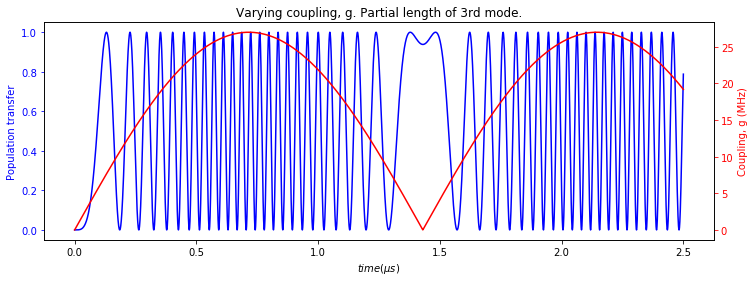

In [15]:
# 3rd harmonic 5000 of 7450 um of length
title = 'Varying coupling, g. Partial length of 3rd mode.'
v = 2000
l = 5 *10**-3
g_max = 27 *10**6
frac_len = 5000/7150
num_wavelengths = 5/4
steps=5000
t = l/v

t_arr = np.linspace(0,t,steps)
g_arr = g_max*((np.sin( np.linspace(0,2*pi*num_wavelengths*frac_len,steps))))

rabi_osc_varying_g(t_arr, g_arr, title=title)